In [1]:
from pandas_datareader import data
from matplotlib import pyplot as plt
import pandas as pd
import datetime
import numpy as np

In [2]:
import pandas_datareader
print pandas_datareader.__version__

0.6.0


In [3]:
# Define the instruments to download. We would like to see Apple, Microsoft and others.
companies_dict = {
'Amazon': 'AMZN',
'Apple': 'AAPL',
'Walgreen': 'WBA',
'Northrop Grumman': 'NOC',
'Boeing': 'BA',
'Lockheed Martin': 'LMT',
'McDonalds': 'MCD',
'Intel': 'INTC',
'Navistar': 'NAV',  
'IBM': 'IBM',
'Texas Instruments': 'TXN',
'MasterCard': 'MA',
'Microsoft': 'MSFT',
'General Electrics': 'GE',
'Symantec': 'SYMC',
'American Express': 'AXP',
'Pepsi': 'PEP',
'Coca Cola': 'KO',
'Johnson & Johnson': 'JNJ',
'Toyota': 'TM',
'Honda': 'HMC',
'Mitsubishi': 'MSBHY',
'Sony': 'SNE',
'Exxon': 'XOM',
'Chevron': 'CVX',
'Valero Energy': 'VLO',
'Ford': 'F',
'Bank of America': 'BAC'}

companies = sorted(companies_dict.items(), key=lambda x: x[1])
#print(companies)

# Define which online source one should use
data_source = 'morningstar'

# Define the start and end dates that we want to see
start_date = '2015-01-01'
end_date = '2017-12-31'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(companies_dict.values(), data_source, start_date, end_date).unstack(level=0)

# Print Axes Labels
print(panel_data.axes)

# Find Stock Open and Close Values
stock_close = panel_data['Close']
stock_open = panel_data['Open']

print(stock_close.iloc[0])
#print(stock_open.iloc[0])

[DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2017-12-18', '2017-12-19', '2017-12-20', '2017-12-21',
               '2017-12-22', '2017-12-25', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name=u'Date', length=782, freq=None), MultiIndex(levels=[[u'Close', u'High', u'Low', u'Open', u'Volume'], [u'AAPL', u'AMZN', u'AXP', u'BA', u'BAC', u'CVX', u'F', u'GE', u'HMC', u'IBM', u'INTC', u'JNJ', u'KO', u'LMT', u'MA', u'MCD', u'MSBHY', u'MSFT', u'NAV', u'NOC', u'PEP', u'SNE', u'SYMC', u'TM', u'TXN', u'VLO', u'WBA', u'XOM']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [4]:
# Calculate daily stock movement
stock_close = np.array(stock_close).T
stock_open = np.array(stock_open).T

row, col = stock_close.shape

movements = np.zeros([row, col])

for i in range(0, row):
    movements[i,:] = np.subtract(stock_close[i,:], stock_open[i,:])

for i in range(0, len(companies)):
   print('Company: {}, Change: {}'.format(companies[i][0], sum(movements[i][:])))
    
# print(movements.shape)

Company: Apple, Change: 16.022
Company: Amazon, Change: -78.5675
Company: American Express, Change: 8.126
Company: Boeing, Change: 111.6019
Company: Bank of America, Change: -4.0698
Company: Chevron, Change: 21.901
Company: Ford, Change: -5.6601
Company: General Electrics, Change: 4.8531
Company: Honda, Change: -9.06
Company: IBM, Change: 18.884
Company: Intel, Change: 20.0416
Company: Johnson & Johnson, Change: 31.88
Company: Coca Cola, Change: 13.3811
Company: Lockheed Martin, Change: 60.84
Company: MasterCard, Change: 25.525
Company: McDonalds, Change: 53.0452
Company: Mitsubishi, Change: 30.5241
Company: Microsoft, Change: 29.5423
Company: Navistar, Change: -0.78
Company: Northrop Grumman, Change: 78.345
Company: Pepsi, Change: 40.1469
Company: Sony, Change: 3.1701
Company: Symantec, Change: 13.1851
Company: Toyota, Change: -19.985
Company: Texas Instruments, Change: 31.1973
Company: Valero Energy, Change: 28.52
Company: Walgreen, Change: -1.4829
Company: Exxon, Change: 9.03


In [5]:
# Import Normalizer
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

# Create a normalizer: normalizer
normalizer = Normalizer()
new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())

0.2615190668148208
-0.26198554519085615
0.0010778514692573902


In [6]:
# Normalizer for use in pipeline
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10, max_iter=1000)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

print(kmeans.inertia_)

9.645378935749008


In [7]:
# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

                   companies  labels
13    (Lockheed Martin, LMT)       0
3               (Boeing, BA)       0
19   (Northrop Grumman, NOC)       0
23              (Toyota, TM)       1
21               (Sony, SNE)       1
6                  (Ford, F)       1
7    (General Electrics, GE)       1
8               (Honda, HMC)       1
16       (Mitsubishi, MSBHY)       1
24  (Texas Instruments, TXN)       2
22          (Symantec, SYMC)       2
17         (Microsoft, MSFT)       2
14          (MasterCard, MA)       2
0              (Apple, AAPL)       2
10             (Intel, INTC)       2
9                 (IBM, IBM)       2
1             (Amazon, AMZN)       2
12           (Coca Cola, KO)       3
20              (Pepsi, PEP)       3
15          (McDonalds, MCD)       4
11  (Johnson & Johnson, JNJ)       4
18           (Navistar, NAV)       5
5             (Chevron, CVX)       6
27              (Exxon, XOM)       6
4     (Bank of America, BAC)       7
2    (American Express, AXP)       7
2

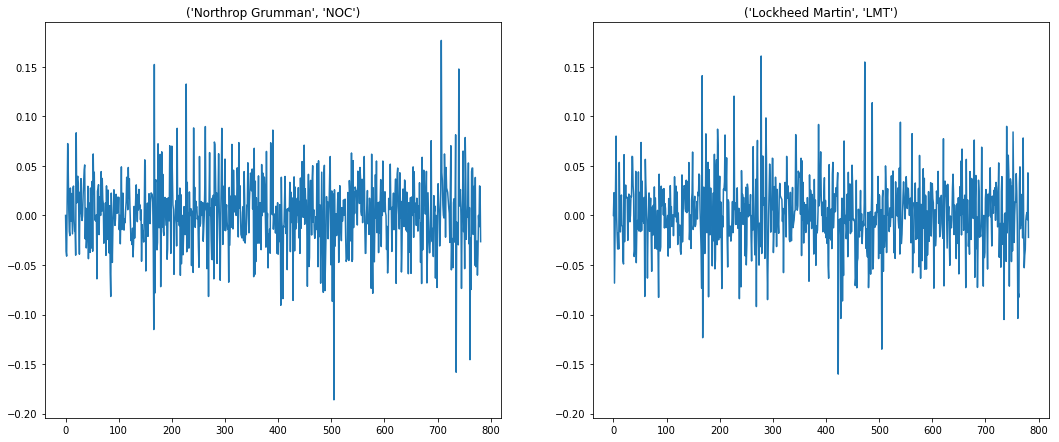

In [8]:
# Visualization - Plot Stock Movements
plt.clf
plt.figure(figsize=(18, 16))
ax1 = plt.subplot(221)
plt.plot(new[19][:])
plt.title(companies[19])

plt.subplot(222, sharey=ax1)
plt.plot(new[13][:])
plt.title(companies[13])
plt.show()

                   companies  labels
3               (Boeing, BA)       0
26           (Walgreen, WBA)       0
25      (Valero Energy, VLO)       1
2    (American Express, AXP)       1
23              (Toyota, TM)       1
8               (Honda, HMC)       1
0              (Apple, AAPL)       2
24  (Texas Instruments, TXN)       2
22          (Symantec, SYMC)       2
14          (MasterCard, MA)       2
20              (Pepsi, PEP)       3
19   (Northrop Grumman, NOC)       3
13    (Lockheed Martin, LMT)       3
11  (Johnson & Johnson, JNJ)       3
12           (Coca Cola, KO)       3
7    (General Electrics, GE)       4
5             (Chevron, CVX)       4
27              (Exxon, XOM)       4
18           (Navistar, NAV)       5
6                  (Ford, F)       5
4     (Bank of America, BAC)       5
16       (Mitsubishi, MSBHY)       6
9                 (IBM, IBM)       6
17         (Microsoft, MSFT)       7
1             (Amazon, AMZN)       7
10             (Intel, INTC)       8
2

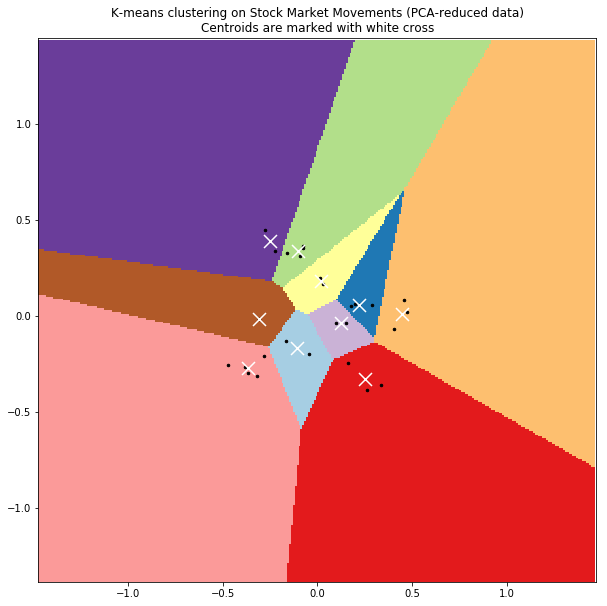

In [9]:
from sklearn.decomposition import PCA

# Visualize the results on PCA-reduced data
# Principal component analysis (PCA)
# Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space

reduced_data = PCA(n_components=2).fit_transform(new)
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# Define Colormap
cmap = plt.cm.Paired

plt.figure(figsize=(10, 10))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=cmap,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on Stock Market Movements (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()
